In [1]:
def catalan(n):
    if n<0 :
        return 0
    if n==0 or n==1:
        return 1
    
    li = [1, 1]
    for step in range(2,n+1):
        hello = sum([li[idx]*li[step-1-idx] for idx in range(len(li))])
        li.append(hello)
    return li[-1]

In [6]:

for n in range(10):
    cn = catalan(n)
    print(n,':',cn)

0 : 1
1 : 1
2 : 2
3 : 5
4 : 14
5 : 42
6 : 132
7 : 429
8 : 1430
9 : 4862


In [3]:
import random
def slope(f, x):
    eps = 1e-6
    return ( f(x+eps)-f(x-eps) ) / ( 2*eps )
    

# Newton's method
# preconditoin : 연속, 미분가능
def find_a_root(func, init_value=None, estimated_range=[-1e+6,1e+6], get_history=False):
    if init_value is None:
        x = random.randint(estimated_range[0], estimated_range[1])
    else:
        x = init_value
    
    eps = 1e-5
    hist = []
    for _ in range(1000):
        hist.append(x)
        if abs(func(x)-0)<eps:
            if get_history is True:
                return hist
            else:
                return (True,x)
        d = slope(func,x)
        if d==0:
            if get_history is True:
                return hist
            else:
                return (False,x)
        x = x - func(x)/d
        
    

In [4]:
import numpy as np
import matplotlib.pyplot as pt

def f(x):
    return x*(x-2)

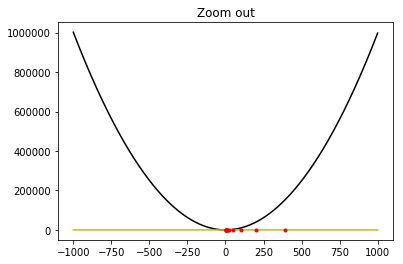

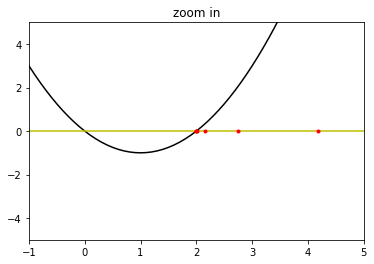

iteration 0 	: 394
iteration 1 	: 197.50126966532653
iteration 2 	: 99.2531789499671
iteration 3 	: 50.1316782681618
iteration 4 	: 25.576015845843617
iteration 5 	: 13.308352976341435
iteration 6 	: 7.194799301631969
iteration 7 	: 4.178112516457331
iteration 8 	: 2.7463823435731785
iteration 9 	: 2.1594973188546325
iteration 10 	: 2.0109700101747676
iteration 11 	: 2.0000595176538902
iteration 12 	: 2.0000000017710784


In [7]:
x_start, x_end = -1000, 1000

h = np.arange(x_start,x_end,0.1)
x = np.arange(x_start,x_end,0.1)
y = f(x)

init_value = random.randint(x_start, x_end)
hist = find_a_root(f, init_value=init_value, get_history=True)
root = hist[-1]

pt.title('Zoom out')
pt.plot(x,y,'k')
pt.plot(h,np.zeros(h.size),'y')
pt.plot(hist,np.zeros(len(hist)),'r.')
pt.show()


pt.figure()
pt.title('zoom in')
pt.plot(x,y,'k')
pt.plot(h,np.zeros(h.size),'y',)
pt.plot(hist,np.zeros(len(hist)),'r.')
pt.xlim([root-3,root+3])
pt.ylim([-5,5])
pt.show()

for idx in range(len(hist)):
    print('iteration',idx,'\t:',hist[idx])